In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats as st



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("AMCAT_data.csv") 
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### Shape of the dataset

In [3]:
data.shape

(3998, 39)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

#### Statistical Summary of the dataset


In [5]:
data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [6]:
data.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

#### Number of Unique values in the each column

In [7]:
print(data.nunique())

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [8]:
data.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

#### Data Manipulation

In [9]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [10]:
data.drop(["Unnamed: 0", "DOJ", "DOL", "CollegeCityID", "CollegeCityTier", "Domain", "ComputerProgramming",
           "ElectronicsAndSemicon", "ComputerScience","MechanicalEngg", "ElectricalEngg", "TelecomEngg", "CivilEngg"], axis=1, inplace=True)

In [11]:
data.head()

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,CollegeState,GraduationYear,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,...,Andhra Pradesh,2011,515,585,525,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,...,Madhya Pradesh,2012,695,610,780,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,...,Uttar Pradesh,2014,615,545,370,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,...,Delhi,2011,635,585,625,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,...,Uttar Pradesh,2012,545,625,465,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   Designation            3998 non-null   object 
 3   JobCity                3998 non-null   object 
 4   Gender                 3998 non-null   object 
 5   DOB                    3998 non-null   object 
 6   10percentage           3998 non-null   float64
 7   10board                3998 non-null   object 
 8   12graduation           3998 non-null   int64  
 9   12percentage           3998 non-null   float64
 10  12board                3998 non-null   object 
 11  CollegeID              3998 non-null   int64  
 12  CollegeTier            3998 non-null   int64  
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

In [13]:
data["Designation"].unique()


array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [14]:
data[data["Designation"] == "get"]
data.drop(data[data["Designation"] == "get"].index, inplace = True)

data

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,CollegeState,GraduationYear,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",2007,95.80,...,Andhra Pradesh,2011,515,585,525,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,2007,85.00,...,Madhya Pradesh,2012,695,610,780,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,systems engineer,Chennai,f,8/3/92 0:00,85.00,cbse,2010,68.20,...,Uttar Pradesh,2014,615,545,370,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,cbse,2007,83.60,...,Delhi,2011,635,585,625,0.0464,0.3448,-0.3440,-0.40780,-0.9194
5,1027655,300000.0,system engineer,Hyderabad,m,7/2/92 0:00,89.92,state board,2010,87.00,...,Karnataka,2014,560,555,620,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,2006,55.50,...,Haryana,2010,365,334,475,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,2009,93.00,...,Telangana,2013,415,410,535,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",2008,65.50,...,Orissa,2012,475,475,465,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,2010,69.88,...,Karnataka,2014,450,410,320,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [15]:
res = data["Designation"].unique()
res.sort()
print(len(res))
res

418


array(['.net developer', '.net web developer', 'account executive',
       'account manager', 'admin assistant', 'administrative coordinator',
       'administrative support', 'aircraft technician',
       'android developer', 'application developer',
       'application engineer', 'apprentice', 'ase', 'asp.net developer',
       'assistant administrator', 'assistant electrical engineer',
       'assistant engineer', 'assistant manager', 'assistant professor',
       'assistant programmer', 'assistant software engineer',
       'assistant store manager', 'assistant system engineer',
       'assistant system engineer - trainee',
       'assistant system engineer trainee', 'assistant systems engineer',
       'associate developer', 'associate engineer', 'associate manager',
       'associate qa', 'associate software developer',
       'associate software engg', 'associate software engineer',
       'associate system engineer', 'associate technical operations',
       'associate test engi

In [16]:
data["Designation"] = data["Designation"].replace(to_replace = "dotnet developer", value = ".net developer" ,regex = False)
data["Designation"] = data["Designation"].replace(to_replace = ".net web developer", value = ".net developer" ,regex = False)

In [17]:
data['Designation'] = data['Designation'].str.capitalize()
data['Designation'] = data['Designation'].str.strip()

In [18]:
designation_mapping = {
    'assistant system engineer - trainee': 'assistant system engineer trainee',
    'assistant systems engineer': 'assistant system engineer',
    'associate software engg': 'associate software engineer',
    'business development managerde': 'business development manager',
    'business systems analyst': 'business system analyst',
    'co faculty': 'computer faculty',
    'db2 dba': 'databapplication support engineer administrator',
    'dba': 'databapplication support engineer administrator',
    'executive engg': 'executive engineer',
    'front end web developer': 'front end developer',
    'graduate trainee engineer': 'graduate engineer trainee',
    
    'hr executive': 'executive hr',
    'jr. software engineer': 'junior software engineer',
    'operations engineer and jetty handling': 'operations engineer',
    'qa analyst': 'quality analyst',
    'qa engineer': 'quality engineer',
    'qa trainee': 'quality trainee',
    'r & d': 'r&d engineer',
    'rf/dt engineer': 'rf engineer',
    'sales and service engineer': 'sales & service engineer',
    'seo': 'seo analyst',
    'software devloper': 'software developer',
    'software eng': 'software engineer',
    'software engg': 'software engineer',
    'software engineere': 'software engineer',
    'software enginner': 'software engineer',
    'software test engineer (etl)': 'software test engineer',
    'software test engineerte': 'software test engineer',
    'sr. engineer': 'senior engineer',
    'team leader': 'team lead',
    'systems analyst': 'system analyst',
    'systems administrator': 'system administrator',
    'testing engineer': 'test engineer',
    'web designer and joomla administrator': 'web designer',
    'web designer and seo': 'web designer',
}

data['Designation'] = data['Designation'].replace(designation_mapping)

In [19]:
len(data["Designation"].unique())


416

In [20]:
data['Designation'].value_counts()


Software engineer                    539
Software developer                   265
System engineer                      205
Programmer analyst                   139
Systems engineer                     118
                                    ... 
Cad drafter                            1
Noc engineer                           1
Human resources intern                 1
Senior quality assurance engineer      1
Jr. software developer                 1
Name: Designation, Length: 416, dtype: int64

In [21]:
data["JobCity"].value_counts()


Bangalore           627
-1                  460
Noida               368
Hyderabad           332
Pune                290
                   ... 
indore                1
Salem                 1
coimbatore            1
Gandhinagar           1
Asifabadbanglore      1
Name: JobCity, Length: 334, dtype: int64

In [22]:
data["JobCity"].unique()


array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Hyderabad',
       'Banglore', 'Noida', 'Kolkata', 'Pune', '-1', 'mohali', 'Jhansi',
       'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', 'Bhopal', 

In [23]:
data['JobCity'] = data['JobCity'].str.strip()
data['JobCity'] = data['JobCity'].str.capitalize()
data['JobCity'] = data['JobCity'].replace(['Banglore','Banagalore','Bengaluru','Banaglore'],'Bangalore' )
data['JobCity'] = data['JobCity'].replace('Nouda','Noida')
data['JobCity'] = data['JobCity'].replace(['Bhubaneshwar', 'Bhubneshwar'],'Bhubaneswar')
data['JobCity'] = data['JobCity'].replace(['Gurgoan', 'Guragaon', 'Gurga'],'Gurgaon')
data['JobCity'] = data['JobCity'].replace(['Ghaziabad',  'Gajiabaad'],'Gaziabaad')
data['JobCity'] = data['JobCity'].replace('Hderabad','Hyderabad')
data['JobCity'] = data['JobCity'].replace('Keral','Kerala')
data['JobCity'] = data['JobCity'].replace(['Kolkata`', 'Calicut'],'Kolkata')
data['JobCity'] = data['JobCity'].replace('Muzzafarpur', 'Muzaffarpur')
data['JobCity'] = data['JobCity'].replace('Navi mumbai , hyderabad', 'Navi mumbai')
data['JobCity'] = data['JobCity'].replace(['New delhi - jaisalmer', 'New dehli'], 'New delhi')
data['JobCity'] = data['JobCity'].replace(['Kochi/cochin','Kochi/cochin, chennai and coimbatore'], 'Kochi')
data['JobCity'] = data['JobCity'].replace('Punr', 'Pune')
data['JobCity'] = data['JobCity'].replace('Punchkula', 'Panchkula')
data['JobCity'] = data['JobCity'].replace(['Pondy', 'Pondi'], 'Pondicherry')
data['JobCity'] = data['JobCity'].replace('Trivandrum', 'Thiruvananthapuram')
data['JobCity'] = data['JobCity'].replace('Tirupathi', 'Tirupati')
data['JobCity'] = data['JobCity'].replace(['Vsakhapttnam', 'Vizag'], 'Visakhapatnam')
data['JobCity'] = data['JobCity'].replace(['Chennai, bangalore', 'Chennai & mumbai'], 'Chennai')
data['JobCity'] = data['JobCity'].replace('Gandhinagar', 'Gandhi nagar')
data['JobCity'] = data['JobCity'].replace('Asifabadbanglore', 'Asifabad')

In [24]:
data["JobCity"] = data["JobCity"].apply(lambda x : x.replace("-1", "India") if "-1" in x else x )
data["JobCity"]  

0       Bangalore
1          Indore
2         Chennai
3         Gurgaon
5       Hyderabad
          ...    
3993    New delhi
3994    Hyderabad
3995    Bangalore
3996     Asifabad
3997      Chennai
Name: JobCity, Length: 3984, dtype: object

In [25]:
data['JobCity'].value_counts()

Bangalore                                 686
India                                     461
Noida                                     390
Hyderabad                                 366
Pune                                      328
                                         ... 
Am                                          1
Sadulpur,rajgarh,distt-churu,rajasthan      1
Bundi                                       1
Ncr                                         1
Asifabad                                    1
Name: JobCity, Length: 196, dtype: int64

In [26]:
len(data["JobCity"].unique())


196

In [27]:
data['Gender'] = data['Gender'].replace('f', 'Female')
data['Gender'] = data['Gender'].replace('m', 'Male')
print(data['Gender'].value_counts())

Male      3027
Female     957
Name: Gender, dtype: int64


In [28]:
data["10board"].value_counts()


cbse                          1387
state board                   1163
0                              349
icse                           280
ssc                            120
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [29]:
data["10board"].unique()


array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', '0', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'm

In [30]:
data["10board"]=data["10board"].apply(lambda x:str(x))

data["10board"] = data["10board"].apply(lambda x : x.replace("0", "Indian Board of Secondary Education") if "0" in x else x)

In [31]:
def board(i):
    if ((i=="Cbse")|(i=="All india board")|(i=='Central board of secondary education')|(i=="Matriculation")|(i=='Certificate of middle years program of ib')| (i=="Central board of secondary education, new delhi")|(i=="Cbsc")|(i=='Cgbse raipur')):
        return "Cbse"
    elif ((i=="Isc")|(i=="Icse")|(i=="Isc board")|(i=="Isce")|(i=="Cicse")|(i=="Isce board")|(i=="New delhi")):
        return "Icse"
    elif ((i=='SSC')|(i=='Up board')|(i=='State')|(i=='Sslc')|(i=='Sslc')|(i=='Sslc')|(i=='Stateboard')):
        return "State board"
    else:
        return "State board"
data['10board'] = data['10board'].apply(board)

In [32]:
data['10board'] = data['10board'].str.strip()
data['10board'] = data['10board'].str.capitalize()

data["10board"].value_counts()


State board    3984
Name: 10board, dtype: int64

In [33]:
data['12board'] = data['12board'].str.strip()
data['12board'] = data['12board'].str.capitalize()

data["12board"].value_counts()


Cbse                               1392
State board                        1254
0                                   358
Icse                                128
Up board                             86
                                   ... 
Hbsc                                  1
Jawahar higher secondary school       1
Nagpur board                          1
Bsemp                                 1
Boardofintermediate                   1
Name: 12board, Length: 336, dtype: int64

In [34]:
data["12board"].unique()

array(['Board of intermediate education,ap', 'Cbse', 'State board',
       'Mp board', 'Isc', 'Icse', 'Karnataka pre university board', 'Up',
       'P u board, karnataka', 'Dept of pre-university education', 'Bie',
       'Kerala state hse board', 'Up board', '0', 'Bseb', 'Chse', 'Puc',
       'Upboard',
       'State  board of intermediate education, andhra pradesh',
       'Karnataka state board',
       'West bengal state council of technical education', 'Wbchse',
       'Maharashtra state board', 'Ssc', 'Isc board',
       'Sda matric higher secondary school', 'Uttar pradesh board', 'Ibe',
       'Chsc', 'Board of intermediate', 'Isce', 'Sbtet',
       'Hisher seconadry examination(state board)', 'Pre university',
       'Borad of intermediate', 'J & k board',
       'Intermediate board of andhra pardesh', 'Rbse',
       'Central board of secondary education', 'Jkbose', 'Hbse',
       'Board of intermediate education', 'State', 'Ms board', 'Pue',
       'Intermediate state board',

In [35]:
data["12board"]=data["12board"].apply(lambda x:str(x))

data["12board"] = data["12board"].apply(lambda x : x.replace("0", "Indian Board of Secondary Education") if "0" in x else x)

In [36]:
def board12(i):
    if ((i=="Cbse")| (i=="Chse")|(i=="All india board")|(i=='Central board of secondary education')|(i=="Matriculation")|(i=='Certificate of middle years program of ib')| (i=="Central board of secondary education, new delhi")|(i=="Cbsc")|(i=="Cbse,new delhi")|(i=="Chsc")|(i=='Cgbse raipur')):
        return "CBSE"
    elif ((i=="Isc")|(i=="Icse")|(i=="Isc board")|(i=="Isce")|(i=="Cicse")|(i=="Isce board")|(i=="New delhi")):
        return "ICSE"
    elif ((i=='SSC')|(i=='Ipe')|(i=='State')|(i=='Intermediate')|(i=='Sslc')|(i=='Sslc')|(i=='Stateboard')):
        return "State board"
    else:
        return "State board"
data['12board'] = data['12board'].apply(board)

data["12board"].value_counts()


State board    2391
Cbse           1417
Icse            176
Name: 12board, dtype: int64

In [37]:
data["Degree"].value_counts()


B.Tech/B.E.      3686
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [38]:
data["Degree"].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [39]:
data["Specialization"].value_counts()


electronics and communication engineering      879
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         193
electronics and electrical engineering         193
electronics & telecommunications               121
electrical engineering                          81
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [40]:
data['Specialization'] = data['Specialization'].str.strip()
data['Specialization'] = data['Specialization'].str.capitalize()

def Specialization(i):
    if (i=="Computer engineering")|(i=="Computer science & engineering")|(i=="Computer application")|(i=="Electronics and computer engineering")|(i=="Computer science and technology")|(i=="Computer and communication engineering")|(i=="Computer networking")|(i=="Computer science"):
        return "CSE"
    elif (i=="Electronics and communication engineering")|(i=="Electronics & telecommunications")|(i=="Electronics engineering")|(i=="Electronics"):
        return "ECE"
    elif (i=="Applied electronics and instrumentation")|(i=="Electronics & instrumentation eng")|(i=="Electronics and instrumentation engineering"):
        return "EIE"
    elif (i=="Electronics and electrical engineering")|(i=="Electrical engineering")|(i=="Electrical and power engineering"):
        return "EEE"
    elif (i=="Information technology")|(i=="Information science engineering")|(i=="Information & communication technology")|(i=="information science"):
        return "IT"
    elif (i=="Mechanical engineering")|(i=="Mechanical and automation")|(i=="Mechanical & production engineering"):
        return "ME"
    elif (i=="Civil engineering"):
        return "Civil"
    else:
        return "Other"
data['Specialization'] = data['Specialization'].apply(Specialization)

In [41]:
data["Specialization"].value_counts()

CSE      1601
ECE      1020
IT        689
EEE       276
ME        198
Other     103
EIE        68
Civil      29
Name: Specialization, dtype: int64

In [42]:
data["CollegeState"].value_counts()


Uttar Pradesh        912
Karnataka            370
Tamil Nadu           367
Telangana            317
Maharashtra          262
Andhra Pradesh       224
West Bengal          196
Punjab               192
Madhya Pradesh       188
Haryana              179
Rajasthan            174
Orissa               172
Delhi                160
Uttarakhand          113
Kerala                33
Jharkhand             26
Chhattisgarh          26
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

In [43]:
data["GraduationYear"].value_counts()


2013    1179
2014    1032
2012     844
2011     506
2010     289
2015      93
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [44]:
data.drop(data[data["GraduationYear"] == 0].index,inplace=True)
data

,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,CollegeState,GraduationYear,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,Senior quality engineer,Bangalore,Female,2/19/90 0:00,84.30,State board,2007,95.80,...,Andhra Pradesh,2011,515,585,525,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,Assistant manager,Indore,Male,10/4/89 0:00,85.40,State board,2007,85.00,...,Madhya Pradesh,2012,695,610,780,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,Systems engineer,Chennai,Female,8/3/92 0:00,85.00,State board,2010,68.20,...,Uttar Pradesh,2014,615,545,370,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,Senior software engineer,Gurgaon,Male,12/5/89 0:00,85.60,State board,2007,83.60,...,Delhi,2011,635,585,625,0.0464,0.3448,-0.3440,-0.40780,-0.9194
5,1027655,300000.0,System engineer,Hyderabad,Male,7/2/92 0:00,89.92,State board,2010,87.00,...,Karnataka,2014,560,555,620,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,Software engineer,New delhi,Male,4/15/87 0:00,52.09,State board,2006,55.50,...,Haryana,2010,365,334,475,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,Technical writer,Hyderabad,Female,8/27/92 0:00,90.00,State board,2009,93.00,...,Telangana,2013,415,410,535,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,Associate software engineer,Bangalore,Male,7/3/91 0:00,81.86,State board,2008,65.50,...,Orissa,2012,475,475,465,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,Software developer,Asifabad,Female,3/20/92 0:00,78.72,State board,2010,69.88,...,Karnataka,2014,450,410,320,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [45]:
data["GraduationYear"].value_counts()


2013    1179
2014    1032
2012     844
2011     506
2010     289
2015      93
2009      24
2017       8
2016       7
2007       1
Name: GraduationYear, dtype: int64

In [46]:
data["12graduation"].value_counts()

2009    1050
2008     932
2010     738
2007     527
2006     405
2005     160
2004      71
2011      45
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12graduation, dtype: int64

In [47]:
# Cleaned data
data.head()


,ID,Salary,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,...,CollegeState,GraduationYear,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,Senior quality engineer,Bangalore,Female,2/19/90 0:00,84.30,State board,2007,95.8,...,Andhra Pradesh,2011,515,585,525,0.9737,0.8128,0.5269,1.3549,-0.4455
1,579905,500000.0,Assistant manager,Indore,Male,10/4/89 0:00,85.40,State board,2007,85.0,...,Madhya Pradesh,2012,695,610,780,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,810601,325000.0,Systems engineer,Chennai,Female,8/3/92 0:00,85.00,State board,2010,68.2,...,Uttar Pradesh,2014,615,545,370,0.2718,1.7109,0.1637,-0.8682,0.6721
3,267447,1100000.0,Senior software engineer,Gurgaon,Male,12/5/89 0:00,85.60,State board,2007,83.6,...,Delhi,2011,635,585,625,0.0464,0.3448,-0.3440,-0.4078,-0.9194
5,1027655,300000.0,System engineer,Hyderabad,Male,7/2/92 0:00,89.92,State board,2010,87.0,...,Karnataka,2014,560,555,620,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608


### Data Visualization

### Univariate Analysis

####  For Categorical Columns:



<Axes: >

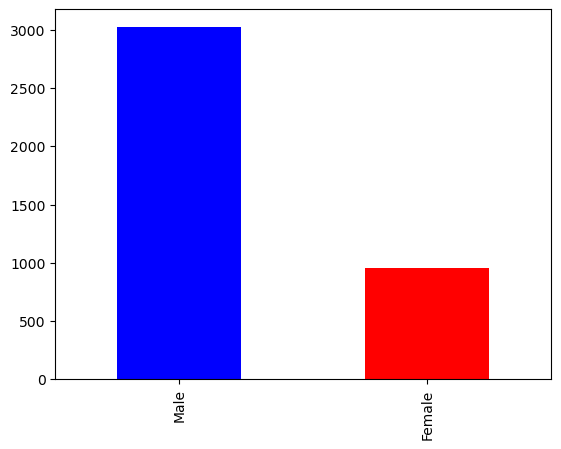

In [48]:
data['Gender'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])

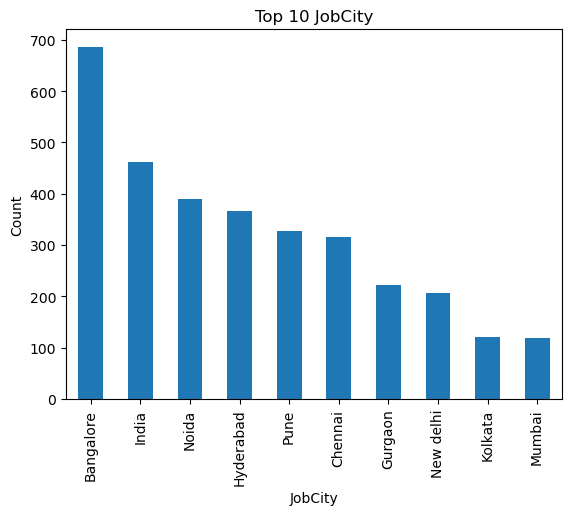

In [49]:
data['JobCity'].value_counts().head(10).plot(kind='bar')
plt.xlabel('JobCity')
plt.ylabel('Count')
plt.title('Top 10 JobCity')
plt.show()


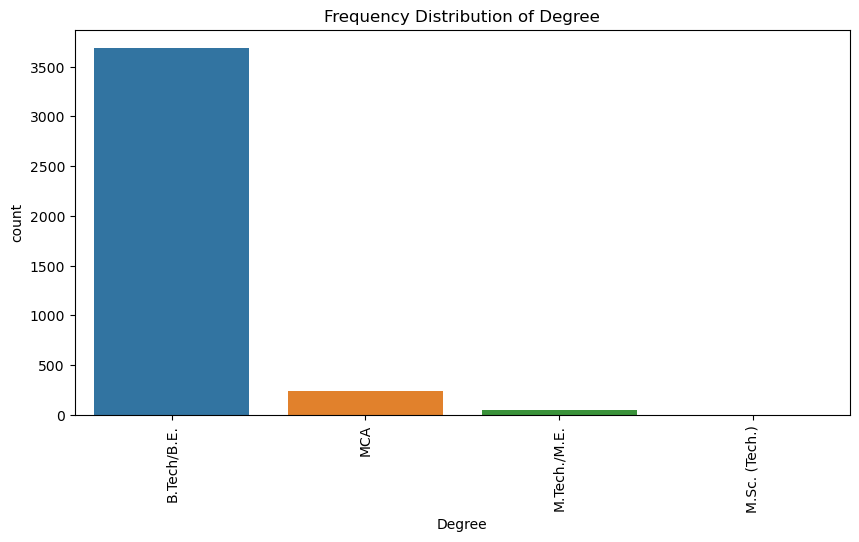

In [50]:
# Count plot of Degree column with color variation
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.countplot(data = data, x = 'Degree')
plt.title("Frequency Distribution of Degree")
plt.show()

#### The countplot illustrates that the majority of employees hold a degree in BTech/BE, while a few number have an MSc degree. Additionally, this plot provides insight into the distribution of various degree streams.



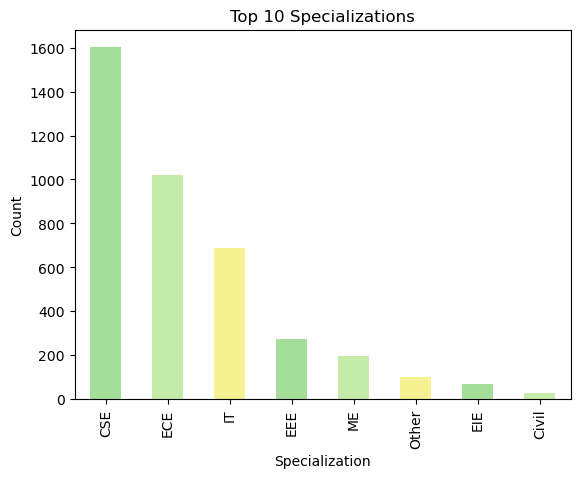

In [51]:
data['Specialization'].value_counts().head(10).plot(kind='bar', color=['#A5DD9B', '#C5EBAA', '#F6F193'])
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Top 10 Specializations')
plt.show()

#### Most of them work in Software Engineering, while the fewest work as Java Developers.

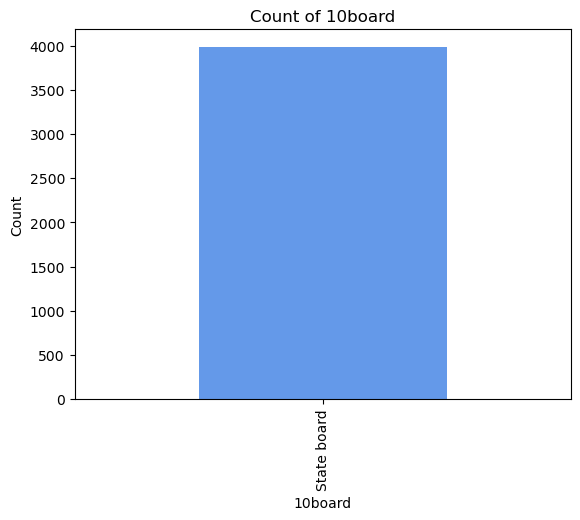

In [52]:
data['10board'].value_counts().plot(kind='bar', color=['#6499E9', '#9EDDFF', '#A6F6FF'])
plt.xlabel('10board')
plt.ylabel('Count')
plt.title('Count of 10board')
plt.show()

<Axes: >

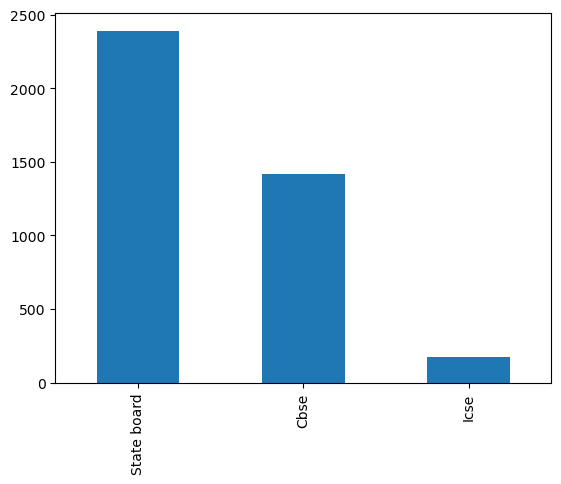

In [53]:
data['12board'].value_counts().plot(kind = 'bar')

#### Based on 10board & 12board most of the people are from State Board and least are ICSE.


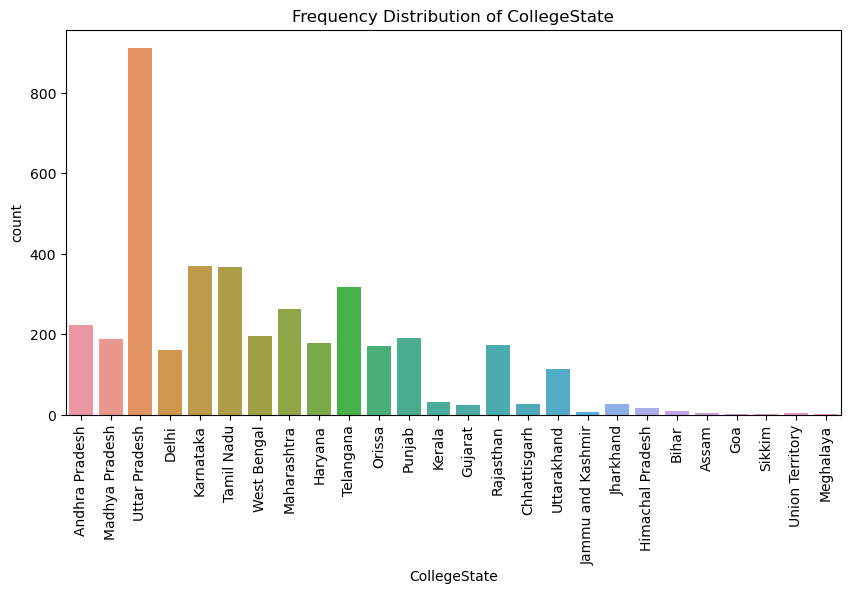

In [54]:
# Count plot of CollegeState column with color variation 
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)  
sns.countplot(x = data["CollegeState"])
plt.title("Frequency Distribution of CollegeState")
plt.show()


#### This Countplot indicates the distribution of employees based on the states where they pursued their education. It reveals that the highest number of employees are from Uttar Pradesh, while there are relatively fewer employees from Meghalaya.

###  For Numerical Columns:


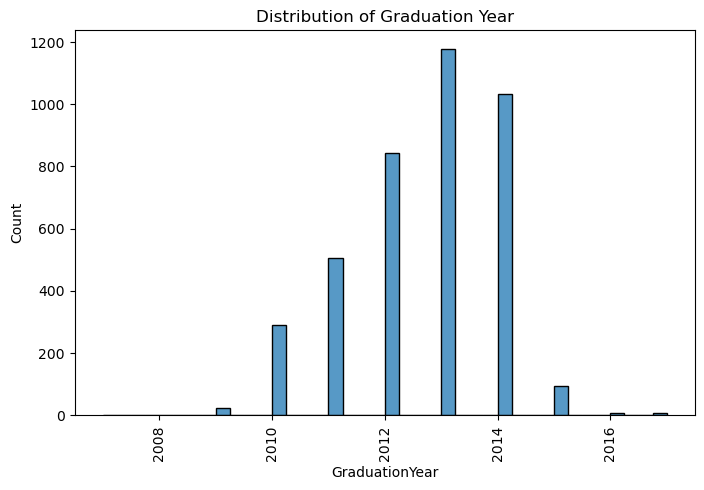

In [55]:
# Histogram and PDFs of GraduationYear
plt.figure(figsize=(8, 5))
plt.xticks(rotation=90)
sns.histplot(data["GraduationYear"])
plt.title("Distribution of Graduation Year")
plt.show()

#### This histogram revelas that majority of employees are completed their GraduationYear in the year 2013

<Axes: xlabel='collegeGPA', ylabel='Density'>

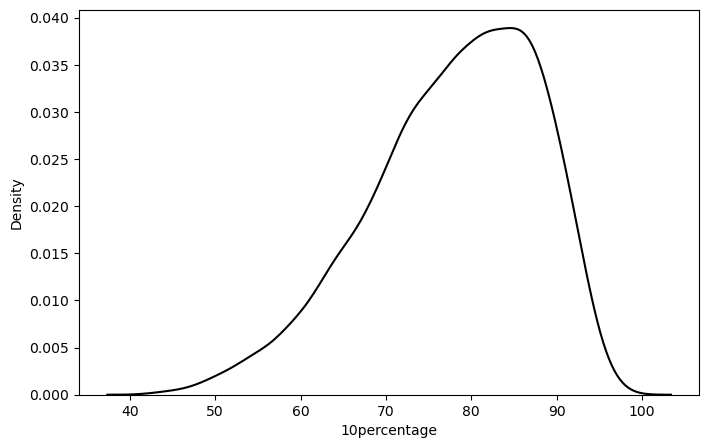

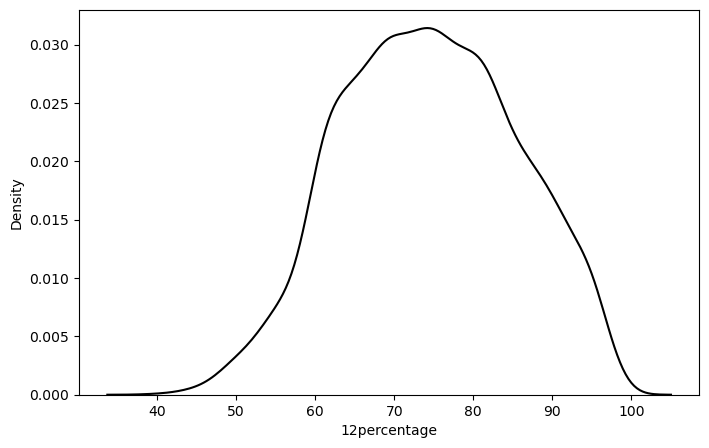

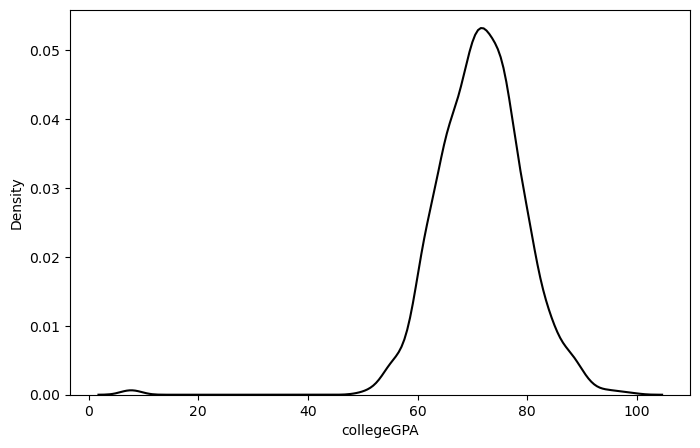

In [56]:
# Kdeplot of 10percentage
plt.figure(figsize=(8, 5))
sns.kdeplot(data["10percentage"], color="k")

# Kdeplot of 12percentage
plt.figure(figsize=(8, 5))
sns.kdeplot(data["12percentage"], color="k")

# Kde plot of collegeGPA
plt.figure(figsize=(8, 5))
sns.kdeplot(data["collegeGPA"], color="k")

#### This KDE plot illustrates the density of employees' 10th percentage, revealing a left-skewed distribution where the majority of employees have around 85% in their 10th-grade exams.


#### This KDE plot shows the density distribution of employees' 12th-grade percentages, resembling a normal distribution with the majority falling between 70% to 80%, indicating a common range for most employees' 12th-grade scores.


#### This KDE plot illustrates the density distribution of employees' college GPA, resembling a normal distribution with the majority falling between 65 to 75, suggesting a common range for most employees' college GPAs.

In [57]:
data.columns

Index(['ID', 'Salary', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [58]:
scores = ['English', 'Logical', 'Quant','Salary']
data[scores]

,English,Logical,Quant,Salary
0,515,585,525,420000.0
1,695,610,780,500000.0
2,615,545,370,325000.0
3,635,585,625,1100000.0
5,560,555,620,300000.0
...,...,...,...,...
3993,365,334,475,280000.0
3994,415,410,535,100000.0
3995,475,475,465,320000.0
3996,450,410,320,200000.0


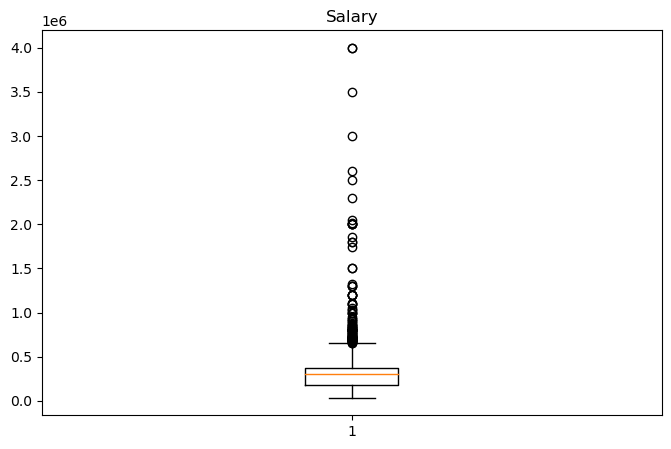

In [59]:
# Box plot of Salary column
plt.figure(figsize=(8, 5))
plt.boxplot(data["Salary"]) 
plt.title("Salary")
plt.show()

#### This Box plot tells abouts the Salary coloumn it shows the marks of each employee and this colomn have high extream outliers.The presence of outliers indicates that there are individuals with exceptionally high or low salaries compared to the rest of the group.

### Boxplot of all numerical columns



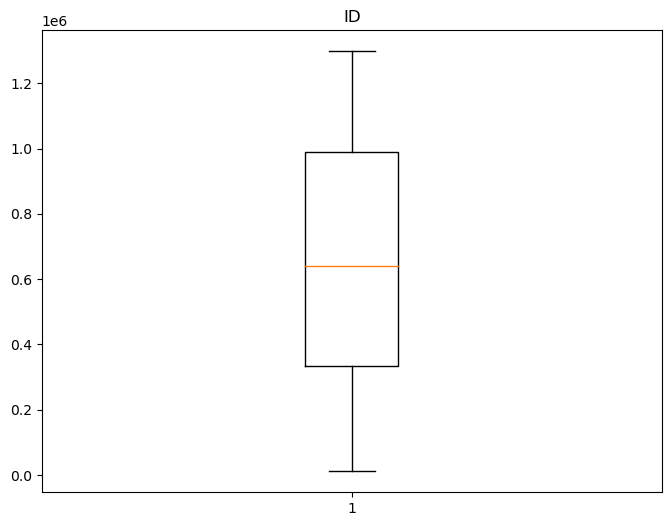

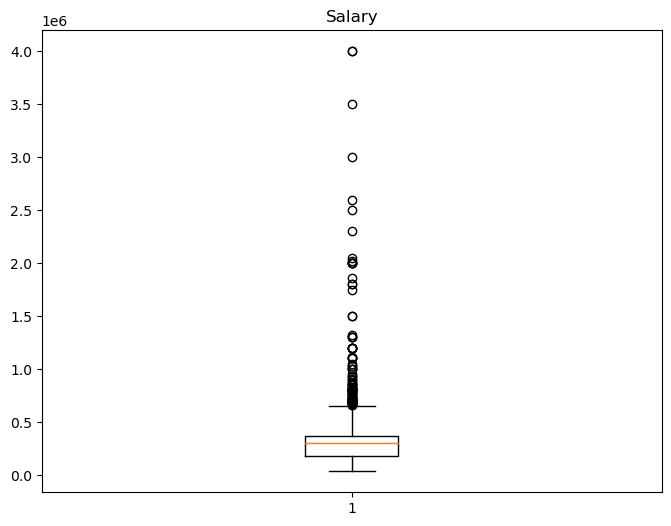

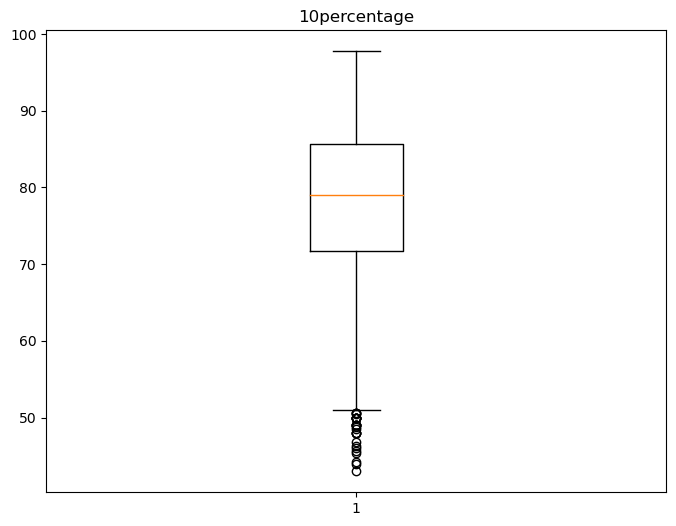

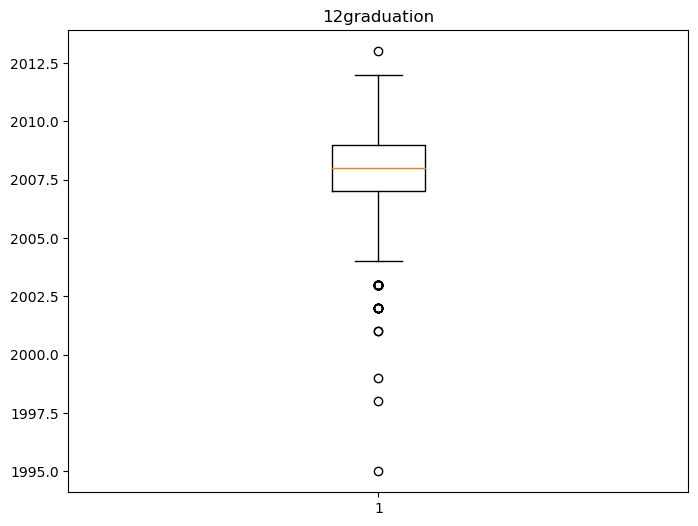

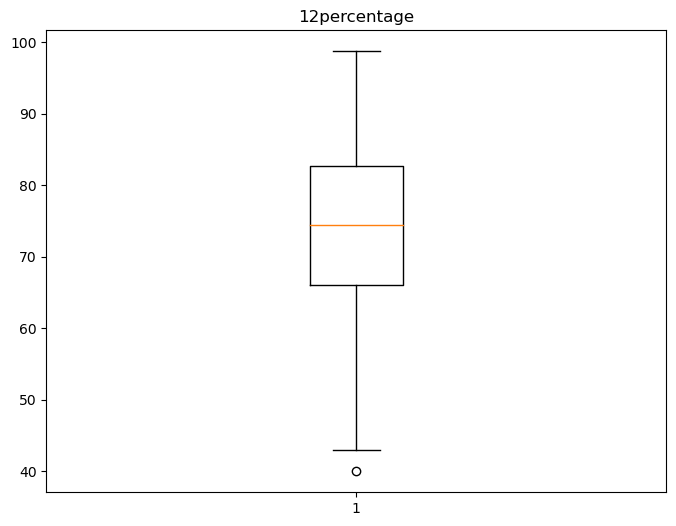

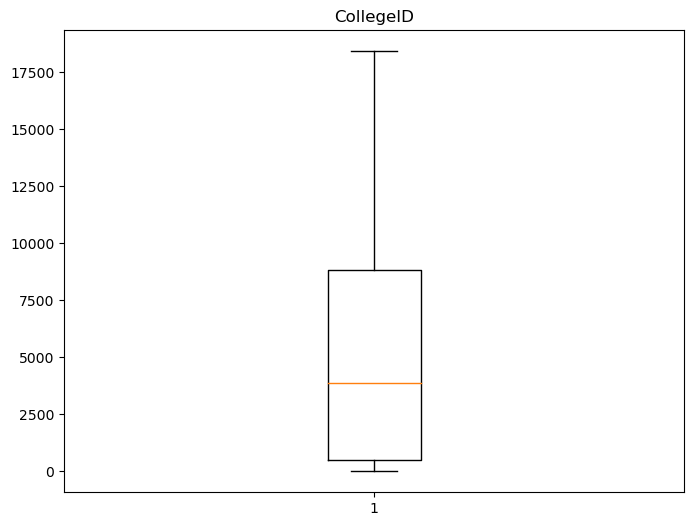

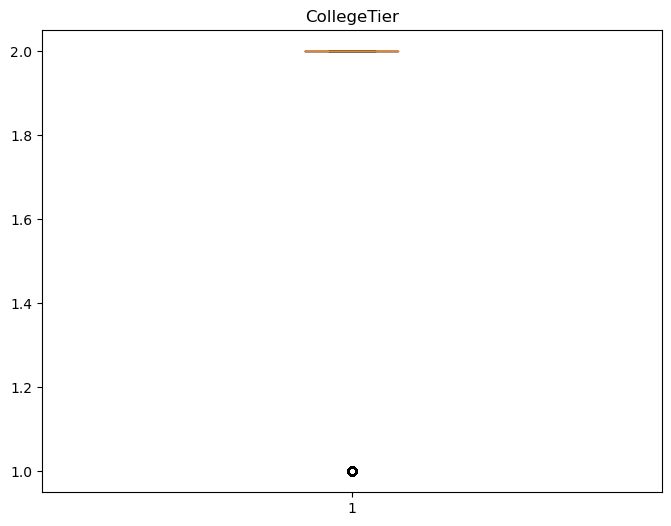

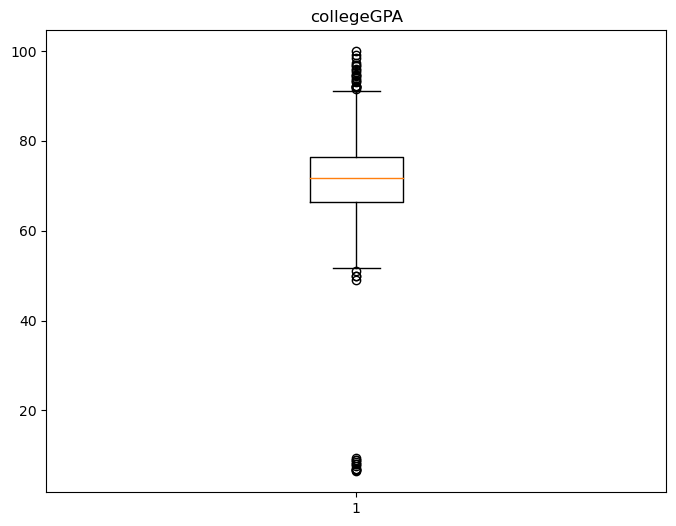

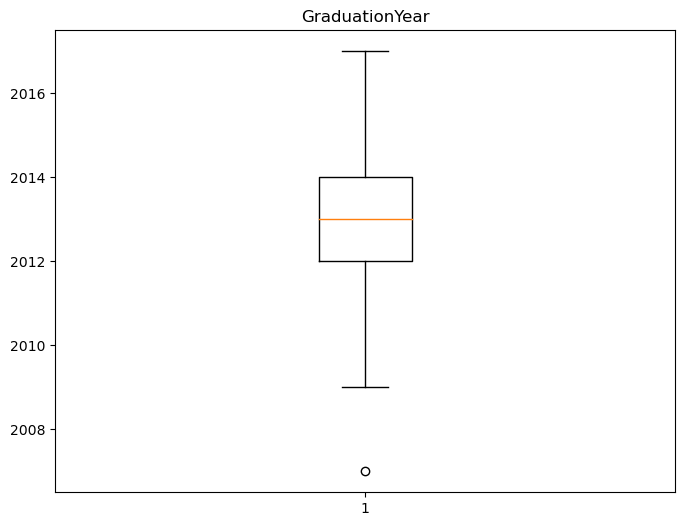

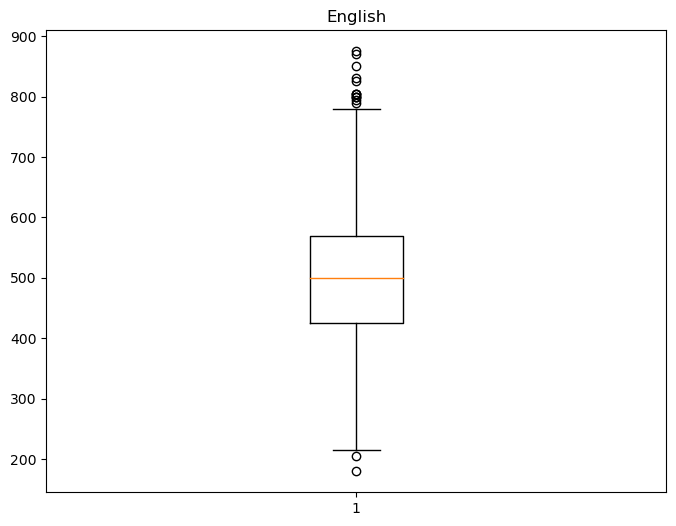

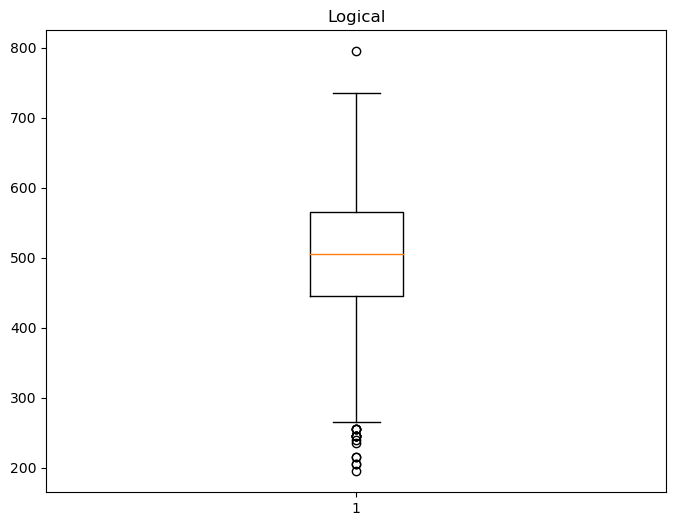

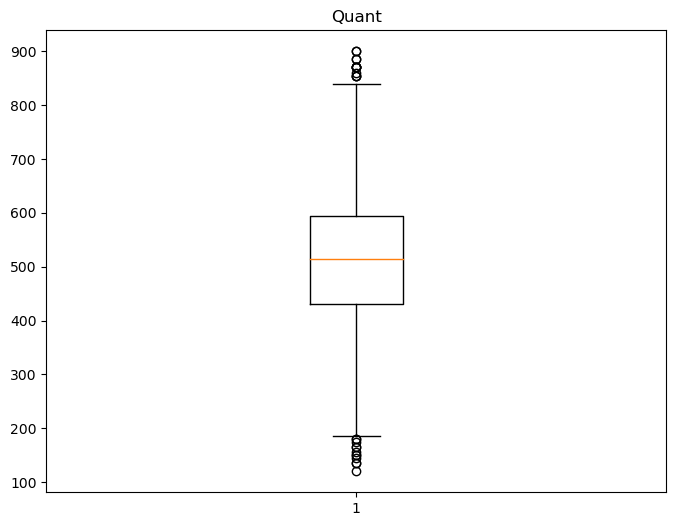

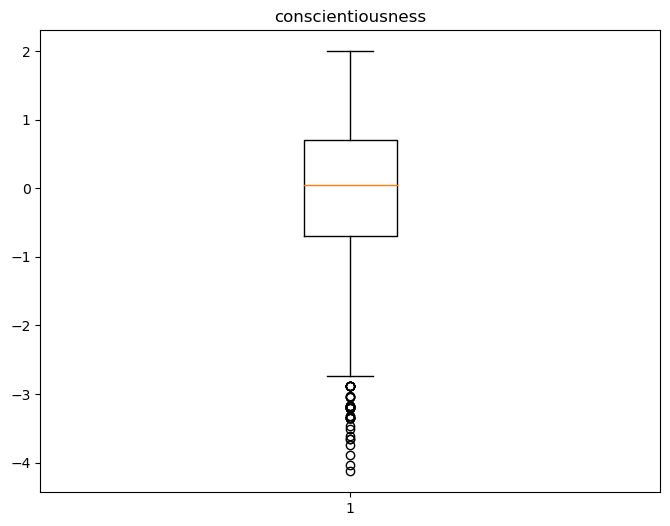

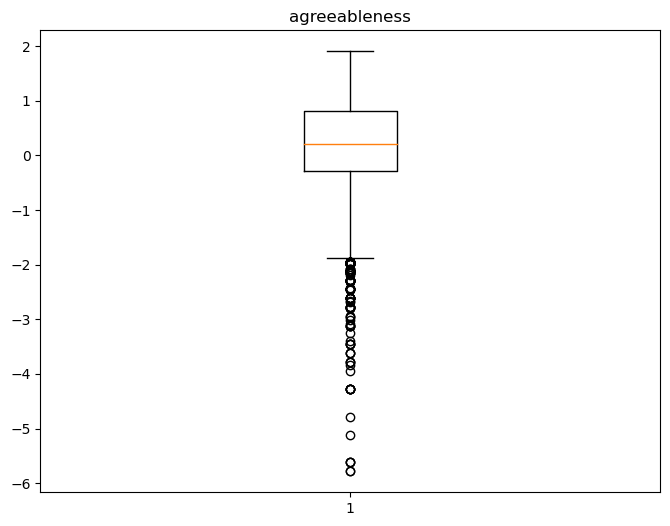

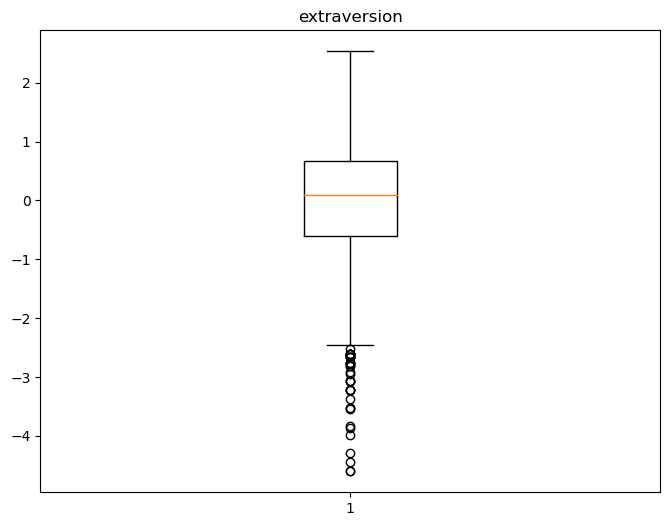

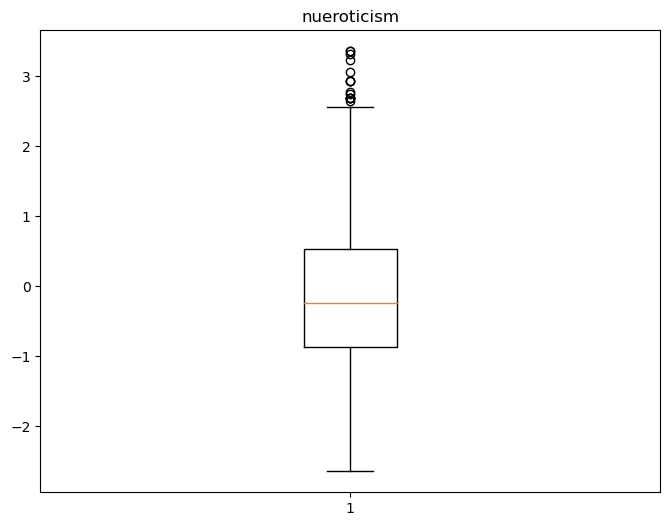

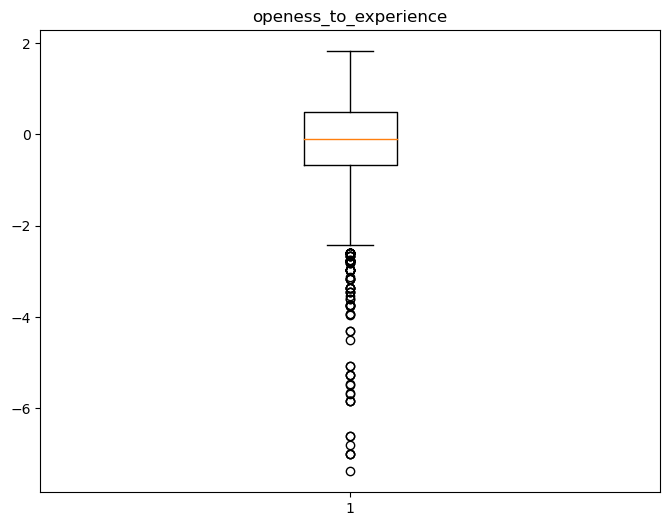

In [60]:
## Boxplot of all numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(x=data[col])
    plt.title(col)
    plt.show()

### Columns with Low and High Extremes Outliers:

#### -->12graduation: This column exhibits both low and high extremes outliers.

#### -->CollegeGPA: Similar to 12graduation, it displays outliers at both ends of the distribution.

#### -->English:There are outliers present at both high and low extremes.

#### -->Logical: This column also shows outliers at both ends of the distribution.

#### -->Quant: Similar to Logical, it has outliers at both high and low extremes.

### Columns with No Outliers:

#### -->ID: There are no outliers observed in this column.

#### -->CollegeID: Similarly, this column does not contain any outliers.

### Columns with High Extremes Outliers Only:

#### -->Salary: Outliers are predominantly located at the high extreme end, indicating significantly higher salaries compared to the majority of employees.

### Columns with Low Extremes Outliers Only:

#### -->10percentage: Outliers are present only at the low extreme end.

#### -->12percentage: Similar to 10percentage, outliers are located at the low extreme.

#### -->GraduationYear: This column exhibits outliers solely at the low extreme.

#### These observations provide insights into the distribution and presence of outliers across different columns in the dataset.

## Bivariate Analysis

### Categorical Vs Categorical


<Axes: xlabel='Gender'>

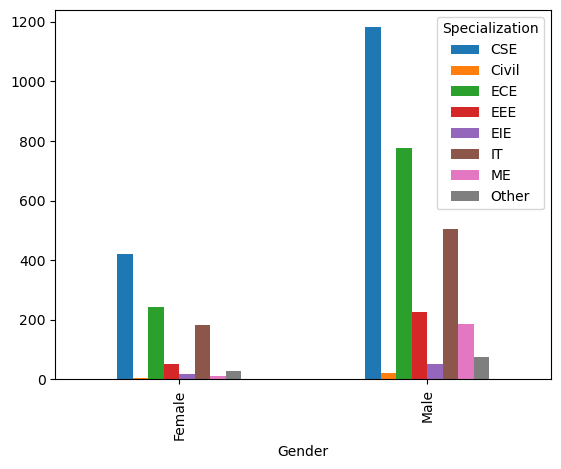

In [61]:
pd.crosstab(data['Gender'],data['Specialization']).plot(kind = 'bar')


<Axes: xlabel='Gender', ylabel='count'>

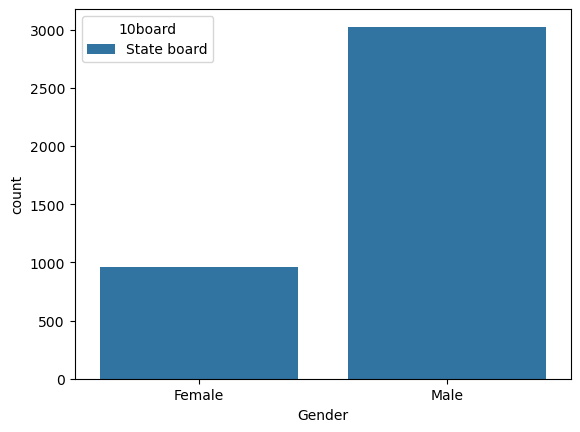

In [62]:
sns.countplot(data = data, x = 'Gender', hue = '10board')


<Axes: xlabel='Gender', ylabel='count'>

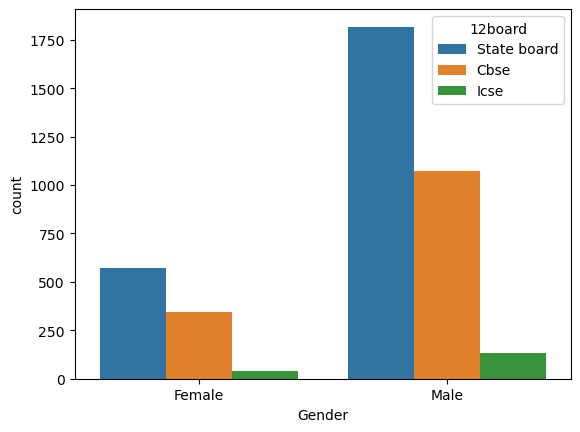

In [63]:
sns.countplot(data = data, x = 'Gender', hue = '12board')


<Axes: xlabel='Degree', ylabel='count'>

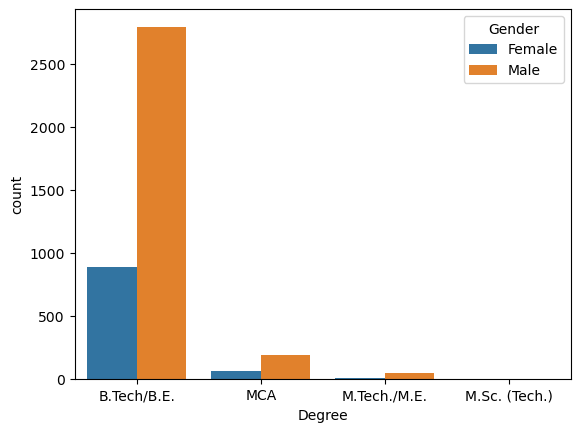

In [64]:
sns.countplot(data=data, x='Degree', hue='Gender')


### Catergorical vs Numerical


In [65]:
data.groupby('Gender')['10percentage'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,957.0,80.932894,8.848698,48.8,75.0,82.4,87.63,97.12
Male,3026.0,76.955820,9.958802,43.0,70.6,78.0,85.00,97.76


<Axes: xlabel='Gender'>

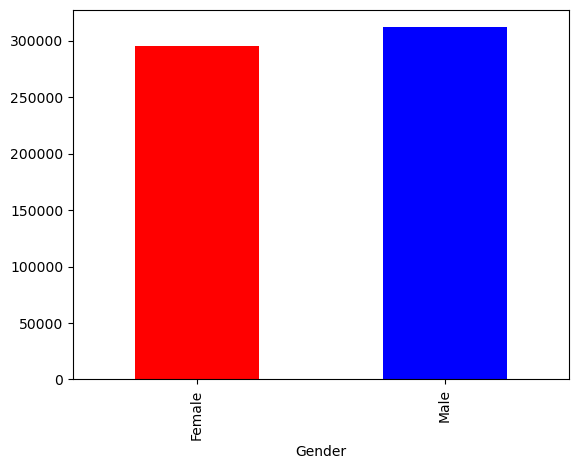

In [66]:
data.groupby(by='Gender')['Salary'].mean().plot(kind ='bar',color=['red','blue'])

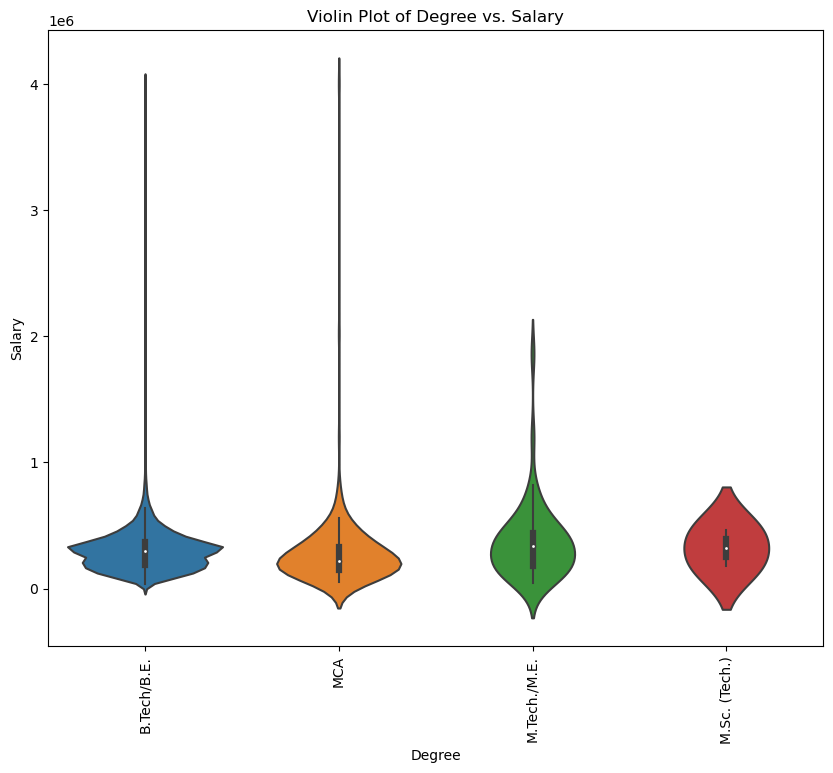

In [67]:
plt.figure(figsize=(10, 8))
sns.violinplot(data = data, x = 'Degree', y = 'Salary')
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.title("Violin Plot of Degree vs. Salary")
plt.xticks(rotation=90)
plt.show()

### Numerical VS Numerical


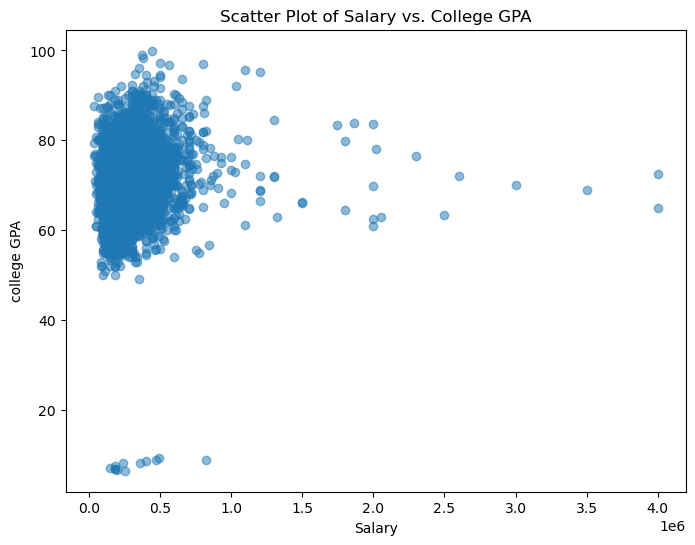

In [68]:
# Scatter plot of Salary vs. CollegeGPA
plt.figure(figsize=(8, 6))
plt.scatter(data["Salary"], data["collegeGPA"], alpha=0.5)
plt.xlabel("Salary")
plt.ylabel("college GPA")
plt.title("Scatter Plot of Salary vs. College GPA")
plt.show()

#### The scatter plot shows salary versus college GPA. Clusters of dots suggest similar salaries across GPAs at lower levels, while fewer dots are scattered at higher salaries, indicating a trend of fewer individuals earning higher incomes regardless of GPA.

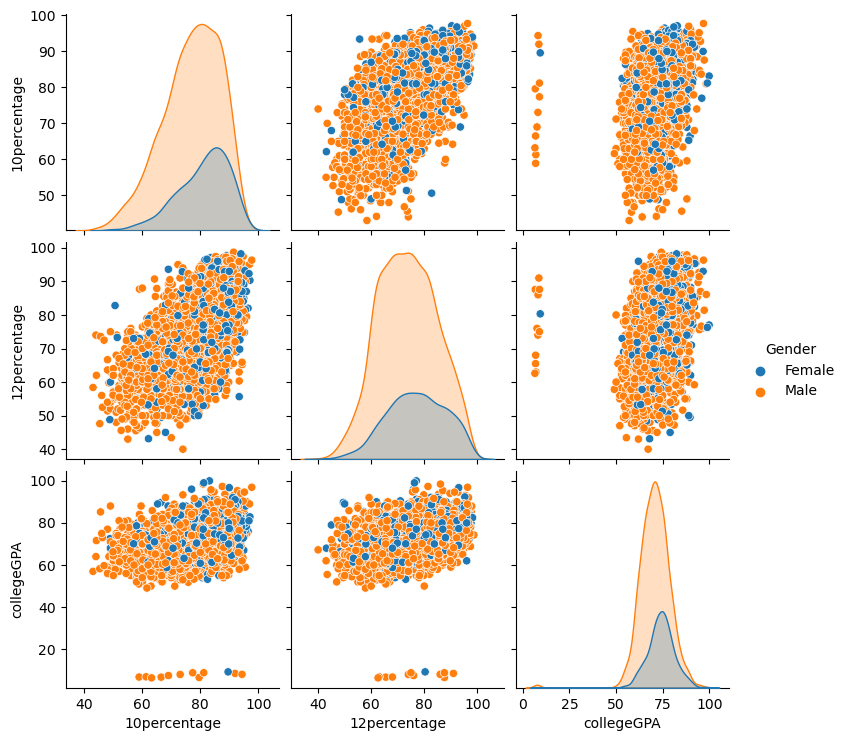

In [69]:
# Pair plot of numerical columns
sns.pairplot( data, x_vars=["10percentage", "12percentage", "collegeGPA"],
                  y_vars=["10percentage", "12percentage","collegeGPA"],
                  hue="Gender")

#### This pair plot tells about all the employee's percentages and it shows the difference of male and female.

### Research Questions

--> Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

--> Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [70]:
# Filter the DataFrame for relevant designations
data_research = data[(data["Designation"]=="programmer analyst")|(data["Designation"]=="software engineer")|(data["Designation"]=="hardware engineer")
       |(data["Designation"]=="associate engineer")]

In [71]:
designation = data[(data['Designation'] == 'Programming analyst') | 
                 (data['Designation'] == 'Software engineer') | 
                 (data['Designation'] == 'Hardware Engineer') |  
                 (data['Designation'] == 'Associate Engineer')]

In [72]:
designation['Salary'].mean()


341215.2133580705

In [73]:
salmean = designation['Salary'].mean()
standard_error = st.sem(designation['Salary'])

ci= st.norm.interval(0.95, loc=salmean, scale=standard_error)
if ci[0] > 250000 or ci[1] < 300000:
    print('We reject the null hypothesis and average salary is not between 250k and 300k.')
else:
    print('We fail to reject the null hypothesis and average salary is between 250k and 300k.')

We reject the null hypothesis and average salary is not between 250k and 300k.


In [74]:
from scipy.stats import chi2_contingency

chi2, p_value, _, _ = chi2_contingency(pd.crosstab(data['Gender'], data['Specialization']))
alpha = 0.05

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 50.61123587794715
P-value: 1.0955811955810303e-08


In [75]:
if p_value < alpha:
    print("There is a significant difference in specialization depending on gender.")
else:
    print("There is no significant difference in specialization depending on gender.")

There is a significant difference in specialization depending on gender.
